In [17]:
import pandas as pd
import numpy as np
from statsmodels.tsa.statespace.varmax import VARMAX
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import matplotlib.pyplot as plt

from sklearn.metrics import mean_absolute_percentage_error, mean_squared_error, r2_score

In [18]:
file_path = '/content/LG.csv'

# Đọc dữ liệu từ file CSV
df = pd.read_csv(file_path, index_col='Date', parse_dates=True)

In [19]:
df

,Close,Open,High,Low
Date,,,,
2019-03-01,101952.316347,102080.608868,103329.880874,100780.079418
2019-03-02,101952.316347,102080.608868,103329.880874,100780.079418
2019-03-03,101952.316347,102080.608868,103329.880874,100780.079418
2019-03-04,71200.000000,70800.000000,71800.000000,70800.000000
2019-03-05,71300.000000,70900.000000,72000.000000,70300.000000
...,...,...,...,...
2024-05-28,109300.000000,97300.000000,109500.000000,97200.000000
2024-05-29,110500.000000,112500.000000,113900.000000,109000.000000
2024-05-30,106300.000000,109500.000000,111100.000000,106200.000000


In [20]:
# Định nghĩa hàm kiểm tra tính dừng
def check_stationarity(data):
    for col in data.columns:
        result = adfuller(data[col])
        print(f'Kiểm tra tính dừng cho cột {col}:')
        print(f'ADF Statistic: {result[0]}')
        print(f'p-value: {result[1]}')
        print(f'Critical Values:')
        for key, value in result[4].items():
            print(f'   {key}: {value}')
        print(f'==> {"Không phải" if result[1] > 0.05 else "Là"} chuỗi dừng\n')

# Gọi hàm kiểm tra tính dừng với DataFrame của bạn
check_stationarity(df)

Kiểm tra tính dừng cho cột Close:
ADF Statistic: -1.6133957774107817
p-value: 0.4761932917881923
Critical Values:
   1%: -3.433800034824216
   5%: -2.8630639946701955
   10%: -2.567581317164871
==> Không phải chuỗi dừng

Kiểm tra tính dừng cho cột Open:
ADF Statistic: -1.6286706178264845
p-value: 0.4681866414264493
Critical Values:
   1%: -3.4338036790464495
   5%: -2.8630656035129878
   10%: -2.5675821738080615
==> Không phải chuỗi dừng

Kiểm tra tính dừng cho cột High:
ADF Statistic: -1.6389714069116221
p-value: 0.4627983130956023
Critical Values:
   1%: -3.433800034824216
   5%: -2.8630639946701955
   10%: -2.567581317164871
==> Không phải chuỗi dừng

Kiểm tra tính dừng cho cột Low:
ADF Statistic: -1.6417554956671172
p-value: 0.46134364311758536
Critical Values:
   1%: -3.4338036790464495
   5%: -2.8630656035129878
   10%: -2.5675821738080615
==> Không phải chuỗi dừng



In [21]:
from sklearn.model_selection import train_test_split

# chia bộ dữ liệu theo tỉ lệ 7:3
train, test = train_test_split(df, test_size=0.3, shuffle=False)

# dùng diff để chuyển đổi bộ dữ liệu
train_diff = train.diff()
train_diff.dropna(inplace = True)

In [22]:
# Định nghĩa hàm kiểm tra tính dừng
def check_stationarity(data):
    for col in data.columns:
        result = adfuller(data[col])
        print(f'Kiểm tra tính dừng cho cột {col}:')
        print(f'ADF Statistic: {result[0]}')
        print(f'p-value: {result[1]}')
        print(f'Critical Values:')
        for key, value in result[4].items():
            print(f'   {key}: {value}')
        print(f'==> {"Không phải" if result[1] > 0.05 else "Là"} chuỗi dừng\n')

# Gọi hàm kiểm tra tính dừng với DataFrame của bạn
check_stationarity(train_diff)

Kiểm tra tính dừng cho cột Close:
ADF Statistic: -10.096168346838892
p-value: 1.0894199909830077e-17
Critical Values:
   1%: -3.4353061595148073
   5%: -2.863728748588099
   10%: -2.567935298646666
==> Là chuỗi dừng

Kiểm tra tính dừng cho cột Open:
ADF Statistic: -10.563778085153018
p-value: 7.608988904439383e-19
Critical Values:
   1%: -3.4353061595148073
   5%: -2.863728748588099
   10%: -2.567935298646666
==> Là chuỗi dừng

Kiểm tra tính dừng cho cột High:
ADF Statistic: -10.040980450098141
p-value: 1.4965808666674092e-17
Critical Values:
   1%: -3.4353061595148073
   5%: -2.863728748588099
   10%: -2.567935298646666
==> Là chuỗi dừng

Kiểm tra tính dừng cho cột Low:
ADF Statistic: -9.004324369263111
p-value: 6.3720535077769995e-15
Critical Values:
   1%: -3.4353136835264664
   5%: -2.863732068602694
   10%: -2.5679370666896233
==> Là chuỗi dừng



In [23]:
!pip install pmdarima

In [24]:
from pmdarima import auto_arima
import pandas as pd
pq = []
for column in train_diff:
    print(f'Cột : {column}')
    stepwise_model = auto_arima(train_diff[column],start_p=1, start_q=1,max_p=5, max_q=5, seasonal=False,
        trace=True,error_action='ignore',suppress_warnings=True, stepwise=True,maxiter=1000)

    parameter = stepwise_model.get_params().get('order')
    print(f'bậc tối ưu cho cột:{column} là: {parameter} \n\n')
    pq.append(stepwise_model.get_params().get('order'))

Cột : Close
Performing stepwise search to minimize aic
 ARIMA(1,0,1)(0,0,0)[0]             : AIC=29621.892, Time=0.38 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=30251.555, Time=0.04 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=30042.476, Time=0.06 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=29636.294, Time=0.13 sec
 ARIMA(2,0,1)(0,0,0)[0]             : AIC=29609.718, Time=0.24 sec
 ARIMA(2,0,0)(0,0,0)[0]             : AIC=29928.660, Time=0.11 sec
 ARIMA(3,0,1)(0,0,0)[0]             : AIC=29594.915, Time=0.32 sec
 ARIMA(3,0,0)(0,0,0)[0]             : AIC=29869.139, Time=0.14 sec
 ARIMA(4,0,1)(0,0,0)[0]             : AIC=29549.959, Time=0.39 sec
 ARIMA(4,0,0)(0,0,0)[0]             : AIC=29825.753, Time=0.18 sec
 ARIMA(5,0,1)(0,0,0)[0]             : AIC=29424.723, Time=0.74 sec
 ARIMA(5,0,0)(0,0,0)[0]             : AIC=29719.208, Time=0.31 sec
 ARIMA(5,0,2)(0,0,0)[0]             : AIC=29120.252, Time=12.59 sec
 ARIMA(4,0,2)(0,0,0)[0]             : AIC=29816.021, Time=2.36 sec
 ARIMA

In [25]:

model = VARMAX(train_diff, order=(5, 2))
results = model.fit()

print(results.summary())


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/varmax.py:160: EstimationWarning: Estimation of VARMA(p,q) models is not generically robust, due especially to identification issues.
  warn('Estimation of VARMA(p,q) models is not generically robust,'
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                                  Statespace Model Results                                  
Dep. Variable:     ['Close', 'Open', 'High', 'Low']   No. Observations:                 1343
Model:                                   VARMA(5,2)   Log Likelihood              -49051.714
                                        + intercept   AIC                          98355.428
Date:                              Sat, 08 Jun 2024   BIC                          99010.964
Time:                                      07:45:53   HQIC                         98600.990
Sample:                                  03-02-2019                                         
                                       - 11-03-2022                                         
Covariance Type:                                opg                                         
Ljung-Box (L1) (Q):     37.78, 0.00, 3.20, 0.08   Jarque-Bera (JB):   205.49, 40867.74, 10139.39, 6265.53
Prob(Q):                 0.00, 0.97, 0.07, 0.78   Prob(JB

In [26]:
predict = results.get_prediction(start = len(train), end = len(train) + len(test) - 1)
predicts = predict.predicted_mean

In [27]:
predicts.columns = ['Open_predicted', 'High_predicted', 'Low_predicted', 'Close_predicted']
predicts['Date'] = test.index
predicts
predicts_date = predicts.set_index('Date')
predicts_date

,Open_predicted,High_predicted,Low_predicted,Close_predicted
Date,,,,
2022-11-04,-3889.024993,-3703.809720,-3769.463207,-3789.579825
2022-11-05,-1113.964904,-1502.030358,-1608.975205,-1279.771441
2022-11-06,-26.473111,-1.882760,218.233712,-80.252613
2022-11-07,-841.241195,-1034.557164,-862.062110,-945.859141
2022-11-08,116.008752,397.855326,232.811001,275.393719
...,...,...,...,...
2024-05-28,-18.784483,-20.093519,-19.214879,-19.738845
2024-05-29,-18.784483,-20.093519,-19.214879,-19.738845
2024-05-30,-18.784483,-20.093519,-19.214879,-19.738845


In [28]:
# Lấy giá trị cuối cùng của dữ liệu gốc trước khi diff
last_original_values = df.iloc[-len(test) - 1]
# Tạo một DataFrame để chứa các giá trị dự đoán gốc
forecast_data = pd.DataFrame(columns=['Open', 'High', 'Low', 'Close'], index=test.index)

# Khởi tạo giá trị bắt đầu với giá trị cuối cùng của dữ liệu gốc
current_values = last_original_values.copy()

# Thực hiện inverse differencing cho từng ngày dự đoán
for index, row in predicts_date.iterrows():
    current_values['Open'] += row['Open_predicted']
    current_values['High'] += row['High_predicted']
    current_values['Low'] += row['Low_predicted']
    current_values['Close'] += row['Close_predicted']
    # Thêm giá trị hiện tại vào DataFrame kết quả
    forecast_data.loc[index] = current_values

In [29]:


# Tính toán MAPE và RMSE
mape = mean_absolute_percentage_error(test, predicts_date)
rmse = np.sqrt(mean_squared_error(test, predicts_date))
mse = mean_squared_error(test, predicts_date)
r2 = r2_score(test, predicts_date)

print(f'MAPE: {mape:.4f}')
print(f'RMSE: {rmse:.4f}')
print(f'MSE: {mse:.4f}')
print(f'R²: {r2:.4f}')

results_GBM = pd.DataFrame([['Gradient Boosting', mape, mse, rmse, r2]],
               columns = ['Model', 'MAE', 'MSE', 'RMSE', 'R2 Score'])
results_GBM

MAPE: 1.0003
RMSE: 103830.0102
MSE: 10780671013.1514
R²: -125.0642


,Model,MAE,MSE,RMSE,R2 Score
0,Gradient Boosting,1.00028,1.078067e+10,103830.010176,-125.064163


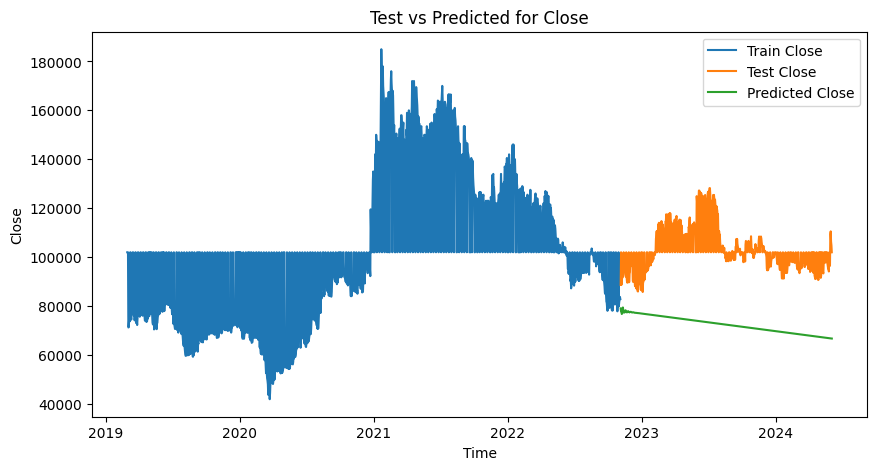

In [31]:
# Vẽ biểu đồ cho mỗi cặp cột
for col in ['Close']:
    plt.figure(figsize=(10, 5))
    plt.plot(train.index, train[col], label=f'Train {col}')
    plt.plot(test.index, test[col], label=f'Test {col}')
    plt.plot(forecast_data.index, forecast_data[col], label=f'Predicted {col}')
    plt.title(f'Test vs Predicted for {col}')
    plt.xlabel('Time')
    plt.ylabel(col)
    plt.legend()
    plt.show()

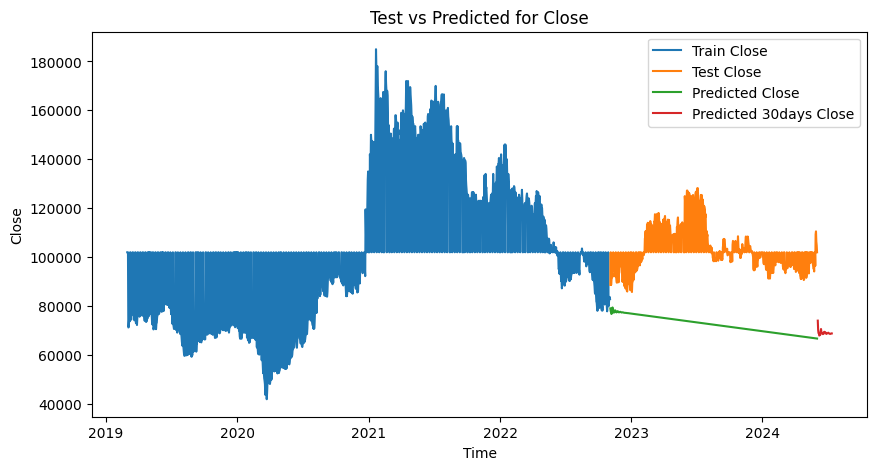

In [32]:

last_original_values_afterPredict = forecast_data.iloc[len(forecast_data) - 1]
# Tạo một DataFrame để chứa các giá trị dự đoán gốc
forecast_data_30days = pd.DataFrame(columns=['Open', 'High', 'Low', 'Close'])

# Khởi tạo giá trị bắt đầu với giá trị cuối cùng của dữ liệu gốc
current_values = last_original_values_afterPredict.copy()

# Dự báo thêm 30 ngày
future_dates = pd.date_range(start=test.index[-1] + pd.Timedelta(days=1), periods=30, freq='B')
future_predict = results.get_forecast(steps=30)
future_predicts = future_predict.predicted_mean
future_predicts.columns = ['Open_predicted', 'High_predicted', 'Low_predicted', 'Close_predicted']
future_predicts['Date'] = future_dates
future_predicts_date = future_predicts.set_index('Date')

# Thực hiện inverse differencing cho các giá trị dự báo tương lai
for index, row in future_predicts_date.iterrows():
    current_values['Open'] += row['Open_predicted']
    current_values['High'] += row['High_predicted']
    current_values['Low'] += row['Low_predicted']
    current_values['Close'] += row['Close_predicted']
    # Thêm giá trị hiện tại vào DataFrame kết quả
    forecast_data_30days.loc[index] = current_values.copy()

# Vẽ biểu đồ cho mỗi cặp cột
for col in ['Close']:
    plt.figure(figsize=(10, 5))
    plt.plot(train.index, train[col], label=f'Train {col}')
    plt.plot(test.index, test[col], label=f'Test {col}')
    plt.plot(forecast_data.index, forecast_data[col], label=f'Predicted {col}')
    plt.plot(forecast_data_30days.index, forecast_data_30days[col], label=f'Predicted 30days {col}')
    plt.title(f'Test vs Predicted for {col}')
    plt.xlabel('Time')
    plt.ylabel(col)
    plt.legend()
    plt.show()

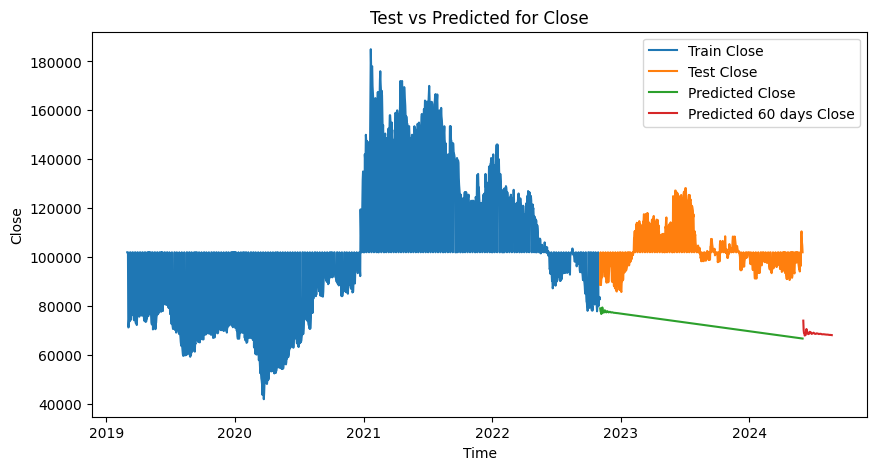

In [33]:

# Tạo một DataFrame để chứa các giá trị dự đoán gốc
forecast_data_60days = pd.DataFrame(columns=['Open', 'High', 'Low', 'Close'])

# Khởi tạo giá trị bắt đầu với giá trị cuối cùng của dữ liệu gốc
current_values = last_original_values_afterPredict.copy()

# Dự báo thêm 60 ngày
future_dates = pd.date_range(start=test.index[-1] + pd.Timedelta(days=1), periods=60, freq='B')
future_predict = results.get_forecast(steps=60)
future_predicts = future_predict.predicted_mean
future_predicts.columns = ['Open_predicted', 'High_predicted', 'Low_predicted', 'Close_predicted']
future_predicts['Date'] = future_dates
future_predicts_date = future_predicts.set_index('Date')

# Thực hiện inverse differencing cho các giá trị dự báo tương lai
for index, row in future_predicts_date.iterrows():
    current_values['Open'] += row['Open_predicted']
    current_values['High'] += row['High_predicted']
    current_values['Low'] += row['Low_predicted']
    current_values['Close'] += row['Close_predicted']
    # Thêm giá trị hiện tại vào DataFrame kết quả
    forecast_data_60days.loc[index] = current_values.copy()

# Vẽ biểu đồ cho mỗi cặp cột
for col in ['Close']:
    plt.figure(figsize=(10, 5))
    plt.plot(train.index, train[col], label=f'Train {col}')
    plt.plot(test.index, test[col], label=f'Test {col}')
    plt.plot(forecast_data.index, forecast_data[col], label=f'Predicted {col}')
    plt.plot(forecast_data_60days.index, forecast_data_60days[col], label=f'Predicted 60 days {col}')
    plt.title(f'Test vs Predicted for {col}')
    plt.xlabel('Time')
    plt.ylabel(col)
    plt.legend()
    plt.show()

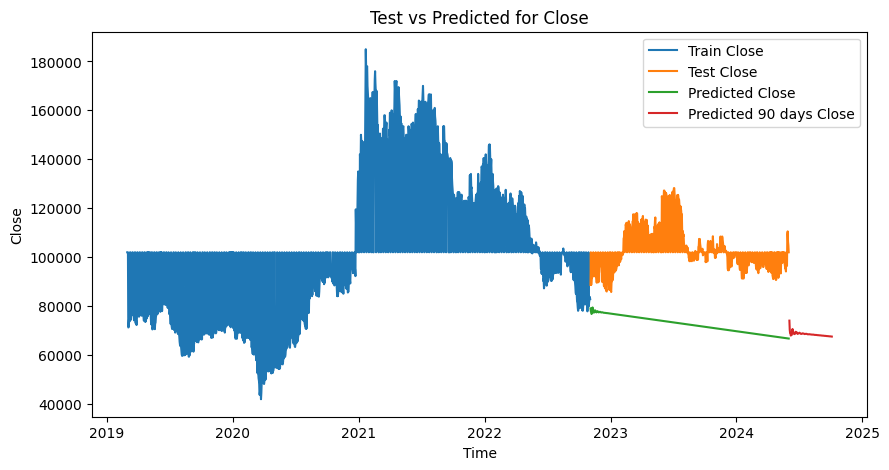

In [34]:

# Tạo một DataFrame để chứa các giá trị dự đoán gốc
forecast_data_90days = pd.DataFrame(columns=['Open', 'High', 'Low', 'Close'])

# Khởi tạo giá trị bắt đầu với giá trị cuối cùng của dữ liệu gốc
current_values = last_original_values_afterPredict.copy()

# Dự báo thêm 90 ngày
future_dates = pd.date_range(start=test.index[-1] + pd.Timedelta(days=1), periods=90, freq='B')
future_predict = results.get_forecast(steps=90)
future_predicts = future_predict.predicted_mean
future_predicts.columns = ['Open_predicted', 'High_predicted', 'Low_predicted', 'Close_predicted']
future_predicts['Date'] = future_dates
future_predicts_date = future_predicts.set_index('Date')

# Thực hiện inverse differencing cho các giá trị dự báo tương lai
for index, row in future_predicts_date.iterrows():
    current_values['Open'] += row['Open_predicted']
    current_values['High'] += row['High_predicted']
    current_values['Low'] += row['Low_predicted']
    current_values['Close'] += row['Close_predicted']
    # Thêm giá trị hiện tại vào DataFrame kết quả
    forecast_data_90days.loc[index] = current_values.copy()

# Vẽ biểu đồ cho mỗi cặp cột
for col in ['Close']:
    plt.figure(figsize=(10, 5))
    plt.plot(train.index, train[col], label=f'Train {col}')
    plt.plot(test.index, test[col], label=f'Test {col}')
    plt.plot(forecast_data.index, forecast_data[col], label=f'Predicted {col}')
    plt.plot(forecast_data_90days.index, forecast_data_90days[col], label=f'Predicted 90 days {col}')
    plt.title(f'Test vs Predicted for {col}')
    plt.xlabel('Time')
    plt.ylabel(col)
    plt.legend()
    plt.show()